In [1]:

import os
import PIL
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from os.path import isfile
from utils import im_to_txt_path

PIL.Image.MAX_IMAGE_PIXELS = 150000000




In [2]:
img_dirs = []
img_dirs.append("rois1/images")
img_dirs.append("rois2/images")
img_dirs.append("data/amyloid_train")

Plot the scatter graph of the size (width x height) of images in the training dataset

In [3]:
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size  # Returns (width, height)

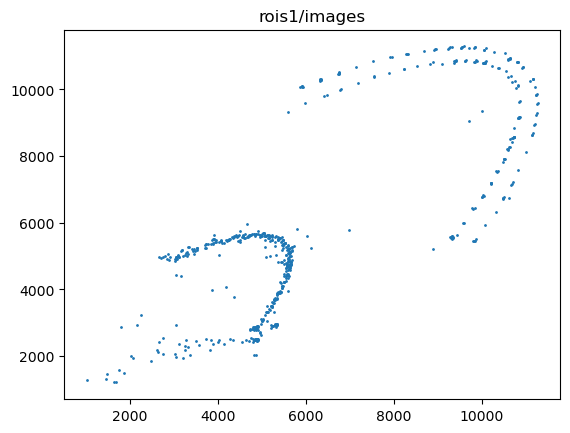

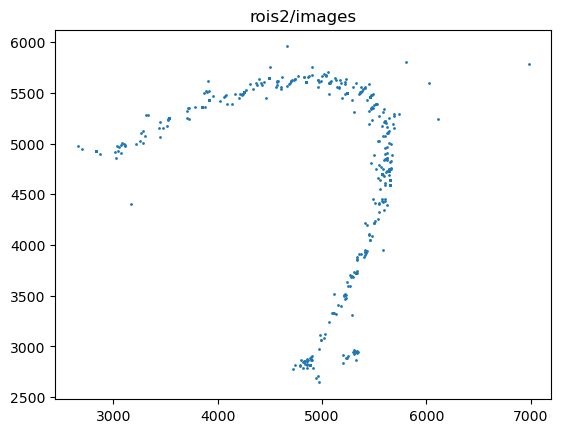

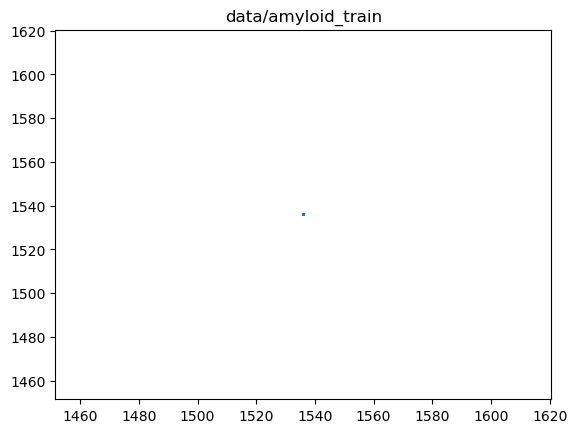

In [4]:
for img_dir in img_dirs:
    W = []
    H = []
    for root, dirs, files in os.walk(img_dir):
        for file in files:
            if file.lower().endswith(('.jpg','.png')):
                image_path = os.path.join(root, file)
                width, height = get_image_dimensions(image_path)
                W.append(width)
                H.append(height)
                # print(f'Image: {file}, Width: {width}, Height: {height}')
    plt.title(img_dir)
    plt.scatter(W,H,s=1)
    plt.show()

Plot the size of annotation labels

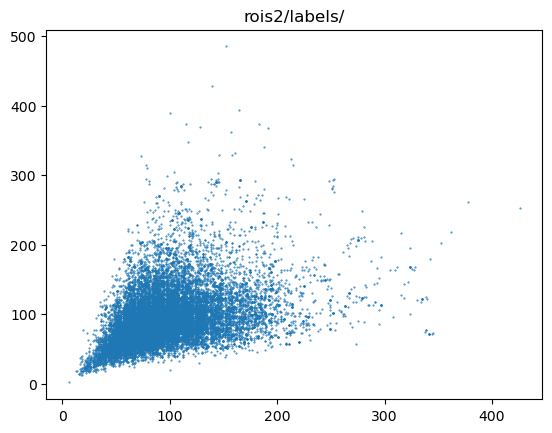

[6, 13, 14, 15, 15, 16, 16, 16, 16, 17] [341, 341, 341, 342, 344, 345, 353, 362, 378, 426]
[2, 13, 13, 14, 14, 15, 15, 16, 17, 17] [348, 362, 368, 369, 373, 374, 390, 394, 428, 485]
[12, 210, 210, 221, 234, 234, 252, 256, 270, 306] [70782, 71306, 71568, 72168, 73720, 73836, 74635, 79278, 98658, 107778]


In [10]:
label_dir = 'rois2/labels/'

W = []
H = []
area = []
ratio = []
for root, dirs, files in os.walk(label_dir):
    for file in files:
        if file.lower().endswith(('.txt')):
            label_path = os.path.join(root, file)
            with open(label_path) as file:
                lines = file.readlines()
                for line in lines:
                    temp = line.split(' ')
                    x1,y1,x2,y2 = temp[1],temp[2],temp[3],temp[4]
            
                    W.append(int(x2)-int(x1))
                    H.append(int(y2)-int(y1))
                    area.append((int(x2)-int(x1))*(int(y2)-int(y1)))
                    ratio.append((int(x2)-int(x1))/(int(y2)-int(y1)))
            # print(f'Image: {file}, Width: {width}, Height: {height}')
plt.title(label_dir)
plt.scatter(W,H,s=0.2)
plt.show()

W.sort()  
H.sort()
area.sort()    
print(W[0:10], W[-10:])
print(H[0:10], H[-10:])
print(area[0:10], area[-10:])

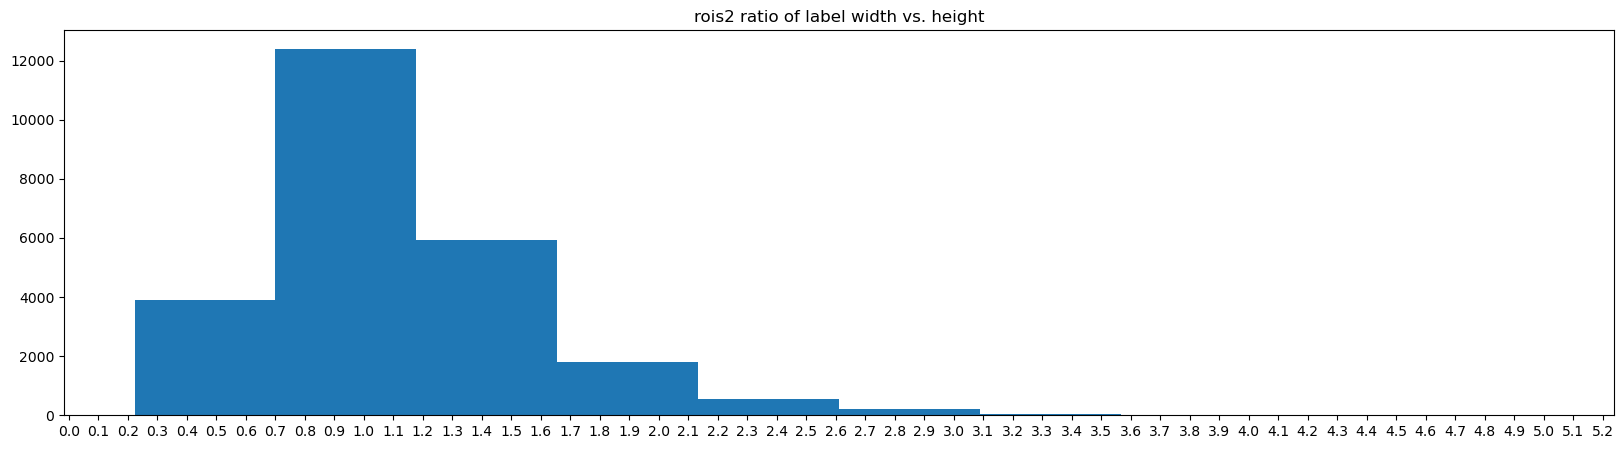

In [11]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
x_major_locator = MultipleLocator(0.1)
x_major_formatter = FormatStrFormatter('%1.1f')
plt.figure(figsize = [20,5])
plt.hist(ratio)
plt.title("rois2 ratio of label width vs. height")
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.xaxis.set_major_formatter(x_major_formatter)
plt.show()

In [5]:
# Read the tiles dataframe, get the path to each tile
# Then use the tile paths to read corresponding label file(.txt) to get the labels
df_path = 'rois2/tiles/tiles dataframe.csv'
tile_size = 1280

tiles_df = pd.read_csv(df_path) #columns: [fp, roi_fp, x, y, tile_size]
W = []
H = []
WH_ratio = []
W_ratio = []
H_ratio = []
for i, tile_fp in enumerate(tiles_df['fp']):
    roi_path = tiles_df['roi_fp'][i]
    roi_width, roi_height = get_image_dimensions(roi_path)
    if isfile(im_to_txt_path(tile_fp)):
        # format the boundaries in to a countour shape
        with open(im_to_txt_path(tile_fp), 'r') as fh: # each line in format: [label, x, y, w, h]
            for line in fh:
                tile_info = line.split(' ')
                w,h = float(tile_info[3]),float(tile_info[4])
                W.append(tile_size * w)
                H.append(tile_size * h)
                WH_ratio.append(w/h)
                W_ratio.append(tile_size * w/ roi_width)
                H_ratio.append(tile_size * h/ roi_height)

FileNotFoundError: [Errno 2] No such file or directory: 'rois2/tiles/tiles dataframe.csv'

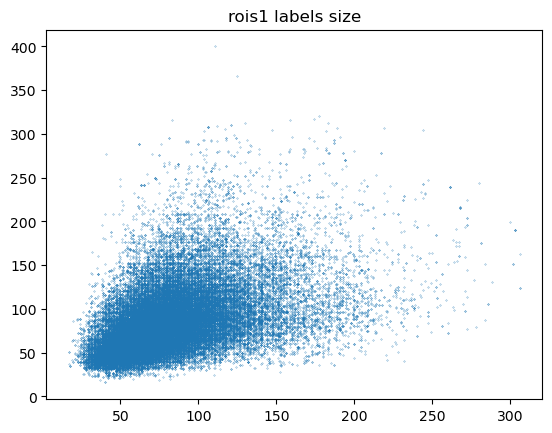

In [ ]:
plt.scatter(W,H,s=0.05)
plt.title("rois2 labels size")
plt.show()

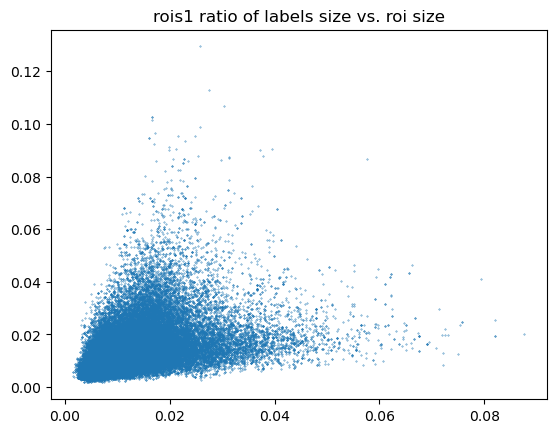

In [ ]:
plt.scatter(W_ratio,H_ratio,s=0.1)
plt.title("rois1 ratio of labels size vs. roi size")
plt.show()

Conclusion: 
    The objects are mostly in size between 30x30 and 150x150
    The shape of objects are mostly with width-to-height ratio [0.7, 1.3]
    